# Exploratory Data Analysis in Python

## Lesson Overview
Welcome to lesson two! Today, we will dive into creating, describing, and visualizing dataframes by using the Matplotlib, Pandas, and Seaborn (All Python libraries).

By the end of this lesson you will be able to:
* Create your own dataframes
* Load csv files as dataframes
* Describe dataframes using Pandas
* Visualize dataframes using Pandas, Seaborn and Matplotlib

# Univariate Data Exploration

Although there are multiple ways to calculate these statistics, we will specifically use pandas for the following reasons:
1. Pandas by itself can calculate all the statistics in a univariate data exploration process. For other packages, we would have to mix and match
2. Pandas is data-centric, taking dataframes as inputs. In other words, pandas treats a dataframe as the main object. This is very similar to R!

### Mean, median, mode, maximum, minimum, standard deviation, variance, and correlation coefficient

To calculate mean, median, mode, maximum, minimum, standard deviation, variance, and correlation coefficient we will use the following pattern.

* mean_all_columns = dataframe_name.mean()

* median_all_columns = dataframe_name.median()

* mode_all_columns = dataframe_name.mode()

* maximum_all_columns = dataframe_name.max()

* min_all_columns = dataframe_name.min()

* std_all_columns = dataframe_name.std()

* var_all_columns = dataframe_name.var()

* corr_all_columns = dataframe_name.corr()

Keep in mind that pandas, by default, will calculate these values column by column.
If we would like to do row by row we would have to type axis = 0 inside the parentheses.

Note that for mean, median, mode, maximum, minium, standard deviation and variance we can specify a column within our dataframe. To do so, after we call our dataframe, we're going to type our column name with quotations inside a square bracket.

* mean_column = dataframe_name["columnName"].mean()

* median_column = dataframe_name["columnName"].median()

* mode_column = dataframe_name["columnName"].mode()

* maximum_column = dataframe_name["columnName"].max()

* min_column = dataframe_name["columnName"].min()

* std_column = dataframe_name["columnName"].std()

* var_column = dataframe_name["columnName"].var()

Now, let's create our own dataframe to play around with these new functions!

In [26]:
# Import pandas library
# Note that you can name the library however you want. "pd" is just a convention that we follow
import pandas as pd

# Firstly, we're going to play around with our own dataframe
students_raw = {"name" : ["A", "B", "C", "D", "E", "G"],
       "gender": ["M","F", "F", "M", "F", "F"],
       "age": [18, 20, 19, 22, 17, 19],
       "gpa": [3.9, 3.7, 3.0, 4.0, 3.3, 3.7]}

# To officially make it a pandas dataframe, we need this code
students_pd = pd.DataFrame(students_raw, columns = ["name", "gender", "age", "gpa"])

# Look at the data
students_pd


,name,gender,age,gpa
0,A,M,18,3.9
1,B,F,20,3.7
2,C,F,19,3.0
3,D,M,22,4.0
4,E,F,17,3.3
5,G,F,19,3.7


In [60]:
# Calculate mean across dataframe
mean_all = students_pd.mean()
print(mean_all)

# Let's calculate the mean for age
mean_age = students_pd["age"].mean()
print("The mean for age: ", mean_age)

age    19.166667
gpa     3.600000
dtype: float64
The mean for age:  19.166666666666668


/var/folders/rm/31m9_p91783drqpmmys24h9h0000gn/T/ipykernel_45391/1136558158.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_all = students_pd.mean()


### Warning message explained:

When we calculated mean_all were asking Jupyter to also calculate the mean of name and gender, which are categorical variables. Therefore, it raises a warning and skips through those 2 columns. To fix this, we simple tell the function mean() to only choose numeric columns in the first place. We can do so by typing numeric_only = True inside the parentheses.

In [61]:
mean_all = students_pd.mean(numeric_only = True)
print(mean_all)

age    19.166667
gpa     3.600000
dtype: float64


### Importing a dataframe from a csv file

We can also import a csv file to work with external data. In order to do so, we are going to use pd.read_csv("nameOfFile.csv).

**Note** : your file must be stored in the same folder as this jupyter notebook.

In [36]:
penguins = pd.read_csv("penguins_lter.csv")

Now, we can look at the first few rows by typing dataframe.head(), or the last few rows by typing dataframe.tail()

In [37]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Range
To calculate range we will use two of the functions we previously learned: max() and min()

In [41]:
# Calculate the max/min culmen length
max_cul_length = penguins["Culmen Length (mm)"].max()
min_cul_length = penguins["Culmen Length (mm)"].min()

# Calculate the age range by subtracting max_age and min_age
cul_length_range = max_cul_length - min_cul_length
print(cul_length_range)

27.5


### Quantiles and Inter Quartile Range (IQR)

To calculate quantiles we will use the same format as before: dataframe["columnName"].quantile()

Inside quantile parentheses we have to indicate which quantile we are calculating

q1 = dataframe["columnName"].quantile(0.25)
q2 = dataframe["columnName"].quantile(0.50)
q3 = dataframe["columnName"].quantile(0.75)

Note that pandas doesn't have a function that calculates directly the IQR. pandas, however, provides a workaround: Calculate Q1 and Q3, then find IQR by subtracting Q1 from Q3.

In [43]:
# Calculate the quantiles of gpa
q1 = penguins["Body Mass (g)"].quantile(0.25)
q3 = penguins["Body Mass (g)"].quantile(0.75)

# Calculate the IQR of gpa
iqr = q3 - q1
print(iqr)

1200.0


### Correlation Coefficient 

To calculate correlation we will make use of the corr() function. Again, we will follow the format dataframe.corr()

**Meanings**:
* 1: Full correlation. If one variable increases, so does the other
* 0: No correlation.
* -1: Full negative correlation. If one variable increases, the other decreases.

In [49]:
# Let's see the correlation between concerts attended and shoe size. Should we expect a value closer to -1, 0 or 1?
penguins_corr = penguins.corr()
print(penguins_corr)

                     Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
Sample Number             1.000000           -0.236356          -0.022352   
Culmen Length (mm)       -0.236356            1.000000          -0.235053   
Culmen Depth (mm)        -0.022352           -0.235053           1.000000   
Flipper Length (mm)       0.040849            0.656181          -0.583851   
Body Mass (g)            -0.007042            0.595110          -0.471916   
Delta 15 N (o/oo)         0.006952           -0.059759           0.605874   
Delta 13 C (o/oo)        -0.488690            0.189025           0.429933   

                     Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
Sample Number                   0.040849      -0.007042           0.006952   
Culmen Length (mm)              0.656181       0.595110          -0.059759   
Culmen Depth (mm)              -0.583851      -0.471916           0.605874   
Flipper Length (mm)             1.000000       0.871202          -0.507

This table is quite confusing to look at, since it is showing us the correlation coefficient between **ALL** variables. So, if we want to look at two specific variables, we can use the same correlation table and indicate our variables by typing: correlationTable.loc["columnName", "columnName"]

In [48]:
# Let's check the correlation between Culmen Length and Culment Depth
culmen_corr = penguins_corr.loc["Culmen Length (mm)", "Culmen Depth (mm)"]
print(culmen_corr)

-0.23505287035553338


# Describing dataframes

In [50]:
# We can display a data summary by typing my_subjects_pd.describe()
# This will show counts, mean, std, min, 25%, 50%, 75%, and max.
penguins.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


As you can see, only quantitative variables are shown on the table. So, let's look at different ways to play around with qualitative variables

## Frequency tables

In [62]:
# Let's recall our dataframe by looking at the last five rows
penguins.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.36390,-26.15531,NaN


In [77]:
# Let's say that we want to create a frequency table of species. 
# To do so, we type dataframe[columnName].value_counts()
freq_one = penguins["Species"].value_counts()
print(freq_one)

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


In [51]:
# Sometimes, we will encounter missing data in our dataframes. To get a sense of how many values are missing we can
# type dataframe.isnull().sum()

penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

# Data Visualization
Now that we have grasped how to summarize our data, let's try plotting it! In this section, we will introduce you to how to create graphs using the python libraries Matplotlib, pandas, and Seaborn. When building data visualizations, our first step is always to import the necessary libraries. Although you only need to load a library once per Jupyter notebook, throughout this handout we will always load libraries before every plot just so we can get into the practice of doing so. 

After loading our libraries, we will need to either gather our data or create our data. In this handout, we will teach how to import data from a .csv file and how to create lists of data for our plots. Finally, we will learn how and what functions to use to create our graph of choice, and how to label and color our plots.

## Matplotlib
### Line Graph

Let's begin by making a single line plot!

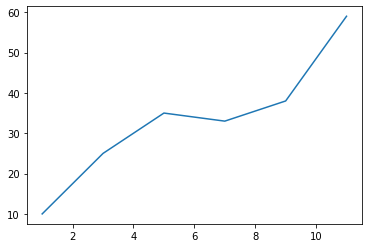

In [16]:
# Load libraries
import matplotlib.pyplot as plt

# Create data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot data
plt.plot(x, y)

# Display plot
plt.show()

Great job! Now let us continue to add more details to our graph. In the matplotlib module, we can add a title to our graph by writing plt.title() and add labels using plt.xlabel for the x-axis and plt.ylabel for the y-axis. Additionally, we can color our line by assigning color within our plt.plot() function.

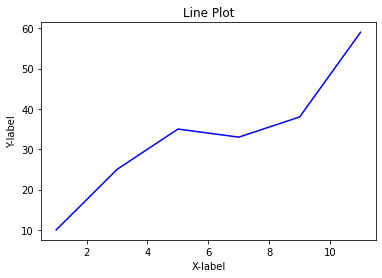

In [10]:
# Load libraries
import matplotlib.pyplot as plt

# Create data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot data and add color
plt.plot(x, y, color = 'blue')

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Line Plot")

# Display plot
plt.show()

What if we wanted to add another line to make a multiple line graph? We complete roughly the same process, and add an additional set of data and one more plot command to see another line appear on this graph. Let's try it out!

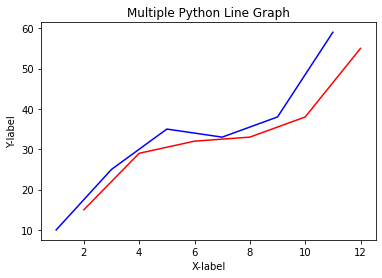

In [17]:
# Load libraries
import matplotlib.pyplot as plt

# Create the first set of data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot first set and color it
plt.plot(x, y, color = 'blue')

# Create the second set of data
x = [2,4,6,8,10,12]
y = [15, 29, 32, 33, 38,55]

# Plot second set and color it
plt.plot(x, y, color = 'red')

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Multiple Python Line Graph")

# Display the graph
plt.show()

Given that we now have multiple lines on our line graph, it would be helpful to have a legend that distinguishes between the two lines. Luckily, we can use legend() and add some code to our plotting functions to create the legend labels.

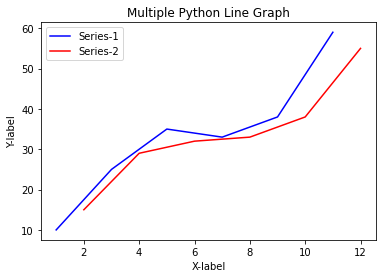

In [18]:
# Load libraries
import matplotlib.pyplot as plt

# Create the first set of data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot first set and color it
plt.plot(x, y, label = 'Series-1', color = 'blue')

# Create the second set of data
x = [2,4,6,8,10,12]
y = [15, 29, 32, 33, 38,55]

# Plot second set and color it
plt.plot(x, y, label = 'Series-2', color = 'red')

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Multiple Python Line Graph")

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

### Pie plot

We can follow a similar process to create pie plots which are great for visualizing proportions of a whole. The method pie() will help us create these graphs.

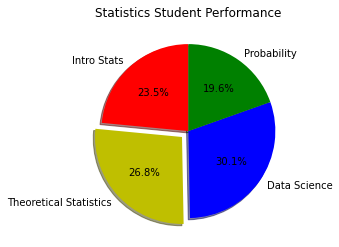

In [34]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
courses = ["Intro Stats", "Theoretical Statistics", "Data Science", "Probability"]
scores = [78, 89, 100, 65]

# Plot the data
plt.pie(scores,
       labels = courses,
       colors = ['r', 'y', 'b', 'g'],
       startangle = 90,
       shadow = True,
       explode = (0, 0.1, 0, 0),
       autopct = '%1.1f%%')

# Add title
plt.title("Statistics Student Performance")

# Display the chart
plt.show()

### Histogram plot

Histograms are a common way to visualize the distribution of a single numeric variable. Furthermore, it shows the probability distribution of a continuous variable, so we will certainly need to use these in our statistical analysis. Let's see how to make histograms using the hist( ) method.

Here we will need to specify the data, bins, and relative width within our histogram function. Our bins will go from 20 to 60 with a 10 years bin size. Additionally, we are using a relative bar width of 0.6, but it is up to you whether or not to haev a thicker and thinner width for the histogram bars.

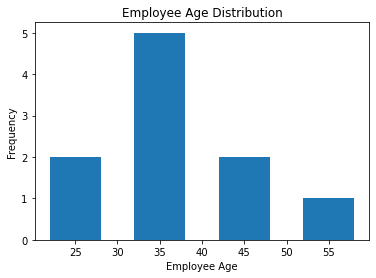

In [37]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
employee_age = [21,28,32,34,35,35,37,42,47,55]

# Create bins for histogram
bins = [20,30,40,50,60]

# Plot the histogram
plt.hist(employee_age, bins, rwidth = 0.6)

# Label axis
plt.xlabel("Employee Age")
plt.ylabel("Frequency")

# Add title
plt.title("Employee Age Distribution")

# Display the graph
plt.show()

## Seaborn
The Seaborn library can help us to make more advanced statistical plots. Seaborn is an open source Python library and uses Matplotlib as a baselibrary to produce interactive and attractive data visualizations.

### Density plots
To plot a univariate distribution of variables, we can make distribution (or density) plots with Seaborn. These figures combine a histogram with a default bin size and a Kernel Density Estimation (KDE) plot. Using a dataset of HR Analytics made available in the code repository for Python Data Analysis - Third Edition, published by Packt let's try to make a distribution plot! The quantitative variable we will investigate is satisfaction_level, which is the employee's satisfaction level in a company.

/Users/angelicasang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


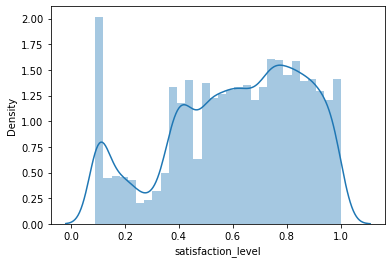

In [46]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
df = pd.read_csv("HR_comma_sep.csv")

# Create a distribution plot
sns.distplot(df.satisfaction_level)

# Display the plot
plt.show()

# NOTE: A warning will appear because the function `distplot` will be removed in the future from seaborn.
# Try on your own to see what happens when we change `distplot` to `histplot` or to `displot`.

# Summary

In this section, you have learned how to calculate some basic summary statistics, as well as how to create common plots. They will serve you well as you explore data with Jupyter. To recap, here are the concepts that we covered:

Summary statistics:
- Mean
- Median
- Mode
- Max, Min, and Range
- IQR
- Variance
- Standard deviation
- Correlation coefficient

Plots:
- Line
- Scatter
- Pie
- Bar
- Histogram
- Density
- Box
- Distribution
- Linear model

# Tips

As you practice the skills learned in this section, please keep in mind the following suggestions:
+ Summary functions, by default, will take the whole data frame and calculate by column.
+ Always remember to load the necessary libraries.
+ Name your variables, dataframes, and labels helpful and informative titles.
+ If you get stuck, use the help documentation that you learned in our previous lecture to help you troubleshoot!
+ If you want extra material on univariate exploratory data analysis, check out the extra material posted on our repo!

# References
Main resources that we used to build this material:

1. Navlani, Avinash, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis. Third Edition. Birmingham: Packt Publishing.

2. Python Data Analysis - Third Edition. (2019). Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv. Accessed July 7, 2022.

3. Numpy documentation: https://numpy.org/doc/

4. Pandas documentation: https://pandas.pydata.org/docs/

5. Statistics documentation: https://docs.python.org/3/library/statistics.html

Although the documentations are often very comprehensive, they are also quite difficult to navigate and find what you need. These websites are simpler, more user-friendly alternatives:

6. GeeksforGeeks: https://www.geeksforgeeks.org/python-programming-language/

7. W3schools: https://www.w3schools.com/python/